In [2]:
!pip install agent-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.1/138.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Used logic & code snippet used in tutorials ::**
https://learn.microsoft.com/en-us/agent-framework/tutorials/agents/structured-output?pivots=programming-language-python

**Some snippets like Human in the Loop approvals, Exposing an agent as an MCP tool -  Python version is developed with trial and error as tutorial is given only for .Net**

# **Creating the agent**

In [ ]:
import asyncio
from agent_framework.azure import AzureOpenAIChatClient
# from azure.identity import AzureCliCredential # AzureCliCredential is not available in Colab

api_key = "Ab2GlJUSQYwxHFUNul6TMIodpXDGxRM7jMCGywlvv2DcTiHwE1J0JQQJ99BJACYeBjFXJ3w3AAABACOG8QKg"
endpoint = "https://agent-azureopenaiclient.openai.azure.com/"
deployment_name = "gpt-5-mini"

agent = AzureOpenAIChatClient(
    # credential=AzureCliCredential(), # Use API key instead
    api_key=api_key, # Replace with your actual API key
    endpoint=endpoint, # Replace with your actual Azure OpenAI endpoint
    deployment_name=deployment_name # Replace with your actual deployment name
).create_agent(
    instructions="You are good at telling jokes.",
    name="Joker"
)

# **Running the agent**

In [ ]:
async def main():
    result = await agent.run("Tell me a joke about a pirate.")
    print(result.text)

await main()

Why did the pirate get a job at the bakery? Because he kneaded the dough!


# **Running the agent with streaming**

In [ ]:
async def main():
    async for update in agent.run_stream("Tell me a joke about a pirate."):
        if update.text:
            print(update.text, end="", flush=True)
    print()  # New line after streaming is complete

await main()

What's a pirate's favorite letter? You might think it's "R," but their first love will always be the "C."


# **Running the agent with a ChatMessage**

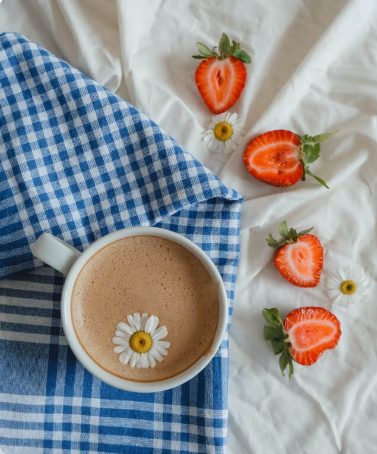

In [ ]:
from agent_framework import ChatMessage, TextContent, UriContent, Role

message = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="Tell me a joke about this image?"),
        UriContent(uri="https://onlinejpgtools.com/images/examples-onlinejpgtools/coffee-with-strawberries.jpg", media_type="image/jpeg")
    ]
)

async def main():
    result = await agent.run(message)
    print(result.text)

await main()

- That's not a latte — that's a "brew-tiful" daisy-cino.  
- Strawberries on the side: "We came for brunch." Coffee: "Sorry, I'm seeing other flowers."  
- I guess this breakfast really took "flower power" literally — petals in the cup, berries on standby!


# **Using images with an agent**

In [ ]:
agent = AzureOpenAIChatClient(
    # credential=AzureCliCredential(), # Use API key instead
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    name="VisionAgent",
    instructions="You are a helpful agent that can analyze images"
)

In [ ]:
message = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        UriContent(
            uri="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
            media_type="image/jpeg"
        )
    ]
)

# **Load an image from local file system using DataContent:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
from agent_framework import DataContent

# Load image from local file
with open("/content/drive/MyDrive/Oliver.jpg", "rb") as f:
    image_bytes = f.read()

message = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        DataContent(
            data=image_bytes,
            media_type="image/jpeg"
        )
    ]
)

In [ ]:
async def main():
    result = await agent.run(message)
    print(result.text)

await main()

# **Running the agent with a multi-turn conversation**

In [ ]:
thread = agent.get_new_thread()

In [ ]:
async def main():
    result1 = await agent.run("Tell me a joke about a pirate.", thread=thread)
    print(result1.text)

    result2 = await agent.run("Now add some emojis to the joke and tell it in the voice of a pirate's parrot.", thread=thread)
    print(result2.text)

await main()

# **Single agent with multiple conversations**

In [ ]:
async def main():
    thread1 = agent.get_new_thread()
    thread2 = agent.get_new_thread()

    result1 = await agent.run("Tell me a joke about a pirate.", thread=thread1)
    print(result1.text)

    result2 = await agent.run("Tell me a joke about a robot.", thread=thread2)
    print(result2.text)

    result3 = await agent.run("Now add some emojis to the joke and tell it in the voice of a pirate's parrot.", thread=thread1)
    print(result3.text)

    result4 = await agent.run("Now add some emojis to the joke and tell it in the voice of a dog.", thread=thread2)
    print(result4.text)

await main()

# **Using function tools with an agent**

In [ ]:
from typing import Annotated
from pydantic import Field
from agent_framework import ai_function

@ai_function(
    name="weather_tool",
    description="Retrieves weather information for any location",
)
def get_weather(
    location: Annotated[str, Field(description="The location to get the weather for.")],
) -> str:
    """Get the weather for a given location."""
    return f"The weather in {location} is cloudy with a high of 15°C."

In [ ]:
agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    name="WeatherAgent",
    instructions="You are a helpful agent that can retrieve weather information.",
    tools=get_weather
)

In [ ]:
async def main():
    result = await agent.run("What is the weather like in Madurai?", debug=True)
    print(result.text)

await main()

# **Creating a class with multiple function tools**

In [ ]:
class WeatherTools:
    def __init__(self):
        self.last_location = None

    def get_weather(self, location:str) -> str:
        """Get the weather for a given location."""
        self.last_location = location
        return f"The weather in {location} is rainy with a high of 20°C."

    def get_weather_details(self) -> str:
        """Get the detailed weather for the last specified location."""
        if self.last_location is None:
            return "No location specified yet."
        return f"The detailed weather in {self.last_location} is rainy with thunderstorm with a high of 23°C, low of 14°C, and 60% humidity."


In [ ]:
tools = WeatherTools()

@ai_function(
    name="weather_tool",
    description="Retrieves weather information for any location"
)
def weather_tool(location: str) -> str:
    return tools.get_weather(location)

@ai_function(
    name="weather_details_tool",
    description="Retrieves detailed weather information for the last specified location"
)
def weather_details_tool() -> str:
    return tools.get_weather_details()

agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    instructions="You are a helpful assistant",
    tools=[weather_tool, weather_details_tool]
)

In [ ]:
async def main():
    result = await agent.run("What is the weather like in Amsterdam ?")
    print(result.text)

    # 2. Ask for more details (no location specified)
    result = await agent.run("Can you give me detailed weather information for the last specified location ?")
    print(result.text)
    # -> Calls weather_details_tool(), which uses last_location ("Amsterdam")

await main()

# **Using function tools with human in the loop approvals**

When agents require any user input, for example to approve a function call, this is referred to as a human-in-the-loop pattern. An agent run that requires user input, will complete with a response that indicates what input is required from the user, instead of completing with a final answer. The caller of the agent is then responsible for getting the required input from the user, and passing it back to the agent as part of a new agent run.

In [ ]:
from agent_framework import BaseAgent, AgentRunResponseUpdate, ChatMessage
from agent_framework.azure import AzureOpenAIChatClient # Import AzureOpenAIChatClient

# STEP 1: Define the weather tool with internal state
class WeatherTools:
    def __init__(self):
        self.last_location = None

    def get_weather(self, location: str) -> str:
        self.last_location = location
        return f"The weather in {location} is cloudy with a high of 15°C."

    def get_weather_details(self) -> str:
        if self.last_location is None:
            return "No location was requested yet."
        return (
            f"Detailed forecast for {self.last_location}: cloudy, \n"
            f"high 15°C, low 10°C, 70% humidity."
        )


# STEP 2: Instantiate the tool
weather_tool = WeatherTools()


# STEP 3: Define tool functions with ai_function decorator
@ai_function(
    name="get_weather",
    description="Get the weather for a given location."
)
def get_weather(location: str) -> str:
    return weather_tool.get_weather(location)

@ai_function(
    name="get_weather_details",
    description="Get detailed weather for the last requested location."
)
def get_weather_details() -> str:
    return weather_tool.get_weather_details()


# STEP 4: Human-in-the-loop wrapper
# Wrapper tracks last location outside agent
class HumanInLoopAgent:
    def __init__(self, inner_agent: BaseAgent):
        self.inner_agent = inner_agent
        self.last_location = None  # Track last location here

    async def run(self, prompt: str) -> AgentRunResponseUpdate:
      print(f"\nHumanInLoopAgent received prompt: {prompt}")

      # Simple location extraction (could be improved)
      if "weather in " in prompt.lower():
          loc_start = prompt.lower().find("weather in ") + len("weather in ")
          location = prompt[loc_start:].strip().rstrip("?")
          if location:
              self.last_location = location
              print(f"Stored last_location: {self.last_location}")

      approval = input("Approve this request? (yes/no): ").strip().lower()
      if approval != "yes":
          print("Human rejected the prompt. No action taken.\n")
          return AgentRunResponseUpdate(text="Human said no. Aborting.")

      # If prompt asks for detailed weather for last location but doesn't specify it explicitly,
      # rewrite prompt to include the stored location.
      if ("detailed weather" in prompt.lower() or "weather details" in prompt.lower()) and \
        ("last specified location" in prompt.lower() or "last requested location" in prompt.lower()):
          if self.last_location:
              prompt = f"Can you give me detailed weather for {self.last_location}?"
              print(f"Modified prompt to include last location: {prompt}")
          else:
              return AgentRunResponse(text="No last location stored. Please specify a location.")

      print("Human approved the prompt. Calling inner agent...\n")
      return await self.inner_agent.run(prompt)



# STEP 5: Create the Azure OpenAI Agent
inner_agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    instructions="You are a helpful assistant.",
    tools=[get_weather, get_weather_details]
)


# Instantiate the human-in-the-loop wrapper agent
agent = HumanInLoopAgent(inner_agent=inner_agent)

async def main():
    for prompt in [
        "What's the weather in Amsterdam?",
        "Can you give me weather details for last specified location ?"
    ]:
        response = await agent.run(prompt)
        print(f"\nPrompt: {prompt}")
        if response.text:
            print(f"Agent: {response.text}")
        else:
            print("Agent returned empty response text.")

await main()

# **Producing Structured Output with Agents**

**Not all agent types support structured output. The ChatAgent supports structured output when used with compatible chat clients.**

When creating or running the agent, we can provide a Pydantic model that defines the structure of the expected output.

In [ ]:
from pydantic import BaseModel

class PersonInfo(BaseModel):
    """Information about a person."""
    name: str | None = None
    age: int | None = None
    occupation: str | None = None

In [ ]:
from agent_framework.azure import AzureOpenAIChatClient
from azure.identity import AzureCliCredential

agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    name="HelpfulAssistant",
    instructions="You are a helpful assistant that extracts person information from text."
)

In [ ]:
response = await agent.run(
    "Please provide information about Deepa Steele, who is a 53-year-old Software Engineer.",
    response_format=PersonInfo
)

**The agent response will contain the structured output in the value property, which can be accessed directly as a Pydantic model instance:**

In [ ]:
if response.value:
    person_info = response.value
    print(f"Name: {person_info.name}, Age: {person_info.age}, Occupation: {person_info.occupation}")
else:
    print("No structured data found in response")

**When streaming, to get the structured output, we need to collect all the updates and then access the final response value:**

In [ ]:
from agent_framework import AgentRunResponse

# Get structured response from streaming agent using AgentRunResponse.from_agent_response_generator
# This method collects all streaming updates and combines them into a single AgentRunResponse
final_response = await AgentRunResponse.from_agent_response_generator(
    agent.run_stream("Please provide information about John Abraham Steele, who is a 25-year-old Director of Development Unit.",
                     response_format=PersonInfo),
    output_format_type=PersonInfo,
)

if final_response.value:
    person_info = final_response.value
    print(f"Name: {person_info.name}, Age: {person_info.age}, Occupation: {person_info.occupation}")

# **Using an agent as a function tool**
**Can use a ChatAgent as a function tool by calling .as_tool() on the agent and providing it as a tool to another agent. This allows to compose agents and build more advanced workflows.**

In [ ]:
weather_agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    name="WeatherAgent",
    description="An agent that answers questions about the weather.",
    instructions="You answer questions about the weather.",
    tools=get_weather
)

**Convert weather_agent to a function tool::**

In [ ]:
main_agent = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
).create_agent(
    instructions="You are a helpful assistant who responds in Tamil.",
    tools=weather_agent.as_tool(
      name="WeatherLookup",
      description="Look up weather information for any location",
      arg_name="query",
      arg_description="The weather query or location"
    )
)

In [ ]:
result = await main_agent.run("What is the weather like in Amsterdam?")
print(result.text)

# **Exposing an agent as an MCP tool**

In [ ]:
from agent_framework import MCPStdioTool  # MCP tool via subprocess/stdio
from agent_framework import ai_function

# Tool that runs via MCP subprocess (e.g. a local Node/TS MCP server)
mcp_tool = MCPStdioTool(
    name="MyMCPTool",
    command="node",  # or whatever executable runs your MCP server
    args=["./mcp-server.js"]  # path to your MCP server script
)

# An example plain function tool
@ai_function(
    name="joke_tool",
    description="Tell a joke."
)
def joke_tool() -> str:
    return "Why did the computer show up at work late? It had a hard drive."

# Create the agent with AzureOpenAIChatClient and MCP tool
client = AzureOpenAIChatClient(
    api_key=api_key,
    endpoint=endpoint,
    deployment_name=deployment_name
)

agent = client.create_agent(
    instructions="You are a helpful assistant that can use MCP tools.",
    tools=[joke_tool, mcp_tool]
)

async def main():
    resp1 = await agent.run("Tell me a joke.")
    print("Agent:", resp1.text)

    resp2 = await agent.run("Use the MCP tool to fetch something.")
    print("Agent:", resp2.text)

await main()


ToolException: Failed to connect to the MCP server. Please check your configuration.

Getting exception "ToolException: Failed to connect to the MCP server. Please check your configuration."

The exception "ToolException: Failed to connect to the MCP server. Please check your configuration." in Google Colab when using MCPStdioTool is a common issue caused by Colab's inability to reliably launch and communicate with subprocesses that manage their own stdin/stdout, such as a local Node.js server for Model Context Protocol (MCP)
Code is correct, but Colab prevents subprocess IPC needed for MCPStdioTool. The only stable solution is to run the MCP server separately, or to use an environment outside of Colab that allows subprocess stdio communication.

# **Enabling observability for Agents**

In [ ]:
import asyncio
from agent_framework.observability import setup_observability

# Enable agent framework telemetry with console output (default behavior)
setup_observability(enable_sensitive_data=True)

**Setup options-configure observability - Programmatic configuration:**

In [ ]:
from agent_framework.observability import setup_observability
import os

# Set the Azure region (any valid Azure region string, e.g., eastus)
os.environ["AZURE_MONITOR_SERVICE_REGION"] = "eastus"

# Step 2: Optionally suppress other noisy warnings like :: WARNING:azure.monitor.opentelemetry.exporter.statsbeat._manager:Exporter is missing a valid region.
os.environ["APPLICATIONINSIGHTS_STATSBEAT_DISABLED"] = "true"
# To supress warnings : 1) set environment variable or 2) execute the following 2 lines
#import logging
#logging.getLogger("azure.monitor.opentelemetry.exporter.statsbeat._manager").setLevel(logging.ERROR)

setup_observability(
    enable_sensitive_data=True,
    otlp_endpoint="http://localhost:4317",
    applicationinsights_connection_string="InstrumentationKey=1f90218e-9383-445d-95df-1a01a987ea98"
)
print("Observability setup complete!")

Observability setup complete!


**Create and run the agent**

In [ ]:
from agent_framework import ChatAgent

# Create the agent - telemetry is automatically enabled
agent = ChatAgent(
    chat_client=AzureOpenAIChatClient(
        api_key=api_key,
        endpoint=endpoint,
        deployment_name=deployment_name
    ),
    name="Joker",
    instructions="You are good at telling jokes."
)

# Run the agent
result = await agent.run("Tell me a joke about a pirate.")
print(result.text)

# NOTE :: The console exporter will show trace data before display the result

{
    "resource_metrics": [
        {
            "resource": {
                "attributes": {
                    "telemetry.sdk.language": "python",
                    "telemetry.sdk.name": "opentelemetry",
                    "telemetry.sdk.version": "1.37.0",
                    "service.name": "agent_framework"
                },
                "schema_url": ""
            },
            "scope_metrics": [
                {
                    "scope": {
                        "name": "agent_framework",
                        "version": "1.0.0b251007",
                        "schema_url": "",
                        "attributes": null
                    },
                    "metrics": [
                        {
                            "name": "gen_ai.client.token.usage",
                            "description": "Captures the token usage of chat clients",
                            "unit": "tokens",
                            "data": {
                            

**Switch Off Observability**

In [ ]:
from opentelemetry.sdk.metrics import MeterProvider
from opentelemetry.sdk.trace import TracerProvider
from opentelemetry import metrics
from opentelemetry import trace
import time

def switch_off_observability():
    """
    Attempts to shut down the global OpenTelemetry Tracer and Meter Providers.
    """
    print("Attempting to shut down OpenTelemetry Providers...")

    # 1. Shut down the global TracerProvider
    tracer_provider = trace.get_tracer_provider()
    if isinstance(tracer_provider, TracerProvider):
        # The shutdown call on the SDK Provider flushes and stops exporters
        tracer_provider.shutdown()
        print("OpenTelemetry Tracer Provider shut down.")
    else:
        print("Global Tracer Provider is not an SDK instance or not set.")

    # 2. Shut down the global MeterProvider
    meter_provider = metrics.get_meter_provider()
    if isinstance(meter_provider, MeterProvider):
        # The shutdown call on the SDK Provider flushes and stops exporters
        meter_provider.shutdown()
        print("OpenTelemetry Meter Provider shut down.")
    else:
        print("Global Meter Provider is not an SDK instance or not set.")

    # Give a moment for any final exports to happen
    time.sleep(1)
    print("Observability components are likely switched off.")

# --- Execution Flow ---

# 1. SETUP (Your initial code)
# from agent_framework.observability import setup_observability
# setup_observability(
#     enable_sensitive_data=True,
#     otlp_endpoint="http://localhost:4317",
#     applicationinsights_connection_string="InstrumentationKey=..."
# )

# ... Run your agent code ...

# 2. SWITCH OFF
# switch_off_observability()

In [ ]:
# To stop warnings and background threads completely
os.environ["APPLICATIONINSIGHTS_STATSBEAT_DISABLED"] = "true"
os.environ.pop("APPLICATIONINSIGHTS_CONNECTION_STRING", None)
os.environ.pop("OTEL_EXPORTER_OTLP_ENDPOINT", None)


In [ ]:
from opentelemetry import trace, metrics
from opentelemetry.sdk.trace import TracerProvider
from opentelemetry.sdk.metrics import MeterProvider
from opentelemetry import metrics
from opentelemetry.sdk.metrics import MeterProvider
import logging

# Shut down and reset observability
try:
    tracer_provider = trace.get_tracer_provider()
    if hasattr(tracer_provider, "shutdown"):
        tracer_provider.shutdown()
except Exception as e:
    print("Tracer shutdown error:", e)

try:
    meter_provider = metrics.get_meter_provider()
    if hasattr(meter_provider, "shutdown"):
        meter_provider.shutdown()
except Exception as e:
    print("Meter shutdown error:", e)

trace.set_tracer_provider(TracerProvider())
metrics.set_meter_provider(MeterProvider())

# After shutdown, immediately reset
metrics.set_meter_provider(MeterProvider())

# Suppress OpenTelemetry noise
logging.getLogger("opentelemetry.sdk.metrics._internal").setLevel(logging.ERROR)
logging.getLogger("opentelemetry.trace").setLevel(logging.ERROR)
logging.getLogger("opentelemetry.metrics._internal").setLevel(logging.ERROR)

print("✅ Observability (traces + metrics) disabled.")


✅ Observability (traces + metrics) disabled.


# **Adding Middleware to Agents**

**Worked out all samples while learning from below links :**

https://github.com/microsoft/agent-framework/tree/main/dotnet/samples/GettingStarted/Agents/Agent_Step14_Middleware

https://learn.microsoft.com/en-us/agent-framework/tutorials/agents/middleware?pivots=programming-language-python

https://learn.microsoft.com/en-us/agent-framework/user-guide/agents/agent-middleware?pivots=programming-language-python

**Step 1: Create a Simple Agent**

In [ ]:
import asyncio
from agent_framework.azure import AzureAIAgentClient
from azure.identity.aio import AzureCliCredential

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GreetingAgent",
        instructions="You are a friendly greeting assistant."
    )
    # Run the agent
    result = await agent.run("Hello !")
    print(result.text)

await main()

Hello! 👋 How are you today? How can I help you?



**Step 2: Create Your Middleware**

In [ ]:
from typing import Callable, Awaitable
from agent_framework import AgentRunContext

async def logging_agent_middleware(
    context: AgentRunContext,
    next: Callable[[AgentRunContext], Awaitable[None]],
) -> None:
    """Simple middleware that logs agent execution."""
    print("Agent starting...")

    # Continue to agent execution
    await next(context)

    print("Agent finished!")


**Step 3: Add Agent level Middleware to Your Agent**

In [ ]:
from agent_framework import FunctionInvocationContext

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GreetingAgent",
        instructions="You are a friendly greeting assistant.",
        middleware=[logging_agent_middleware],
    )
    # Run the agent
    result = await agent.run("Hello !")
    print(result.text)

await main()


Agent starting...
Agent finished!
Hello! Nice to meet you — how are you today?


**Another Way :: Using Agent Middleware Decorator**

In [ ]:
from agent_framework import agent_middleware

@agent_middleware  # Explicitly marks as agent middleware
async def simple_agent_middleware(context, next):
    """Agent middleware with decorator - types are inferred."""
    print("Before agent execution")
    await next(context)
    print("After agent execution")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GreetingAgent",
        instructions="You are a friendly greeting assistant.",
        middleware=[simple_agent_middleware],
    )
    # Run the agent
    result = await agent.run("Hello !")
    print(result.text)

await main()


Before agent execution
After agent execution
Hello! Nice to meet you — how can I help you today?


**Step 4: Create Function Middleware**
**If agent uses functions, can intercept function calls:**

In [ ]:
from agent_framework import FunctionInvocationContext

def get_time():
    """Get the current time."""
    from datetime import datetime
    return datetime.now().strftime("%H:%M:%S")

async def logging_function_middleware(
    context: FunctionInvocationContext,
    next: Callable[[FunctionInvocationContext], Awaitable[None]],
) -> None:
    """Middleware that logs function calls."""
    print(f"Calling function: {context.function.name}")

    await next(context)

    print(f"Function result: {context.result}")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="TimeAgent",
        instructions="You can tell the current time.",
        tools=[get_time],
        middleware=[logging_function_middleware],
    )
    # Run the agent
    print("Running agent...")

    userQuery = "What time is it?"
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : {result.text}")

await main()

Running agent...
Calling function: get_time
Function result: 05:09:03
User Query : What time is it?
Agent Response : The current time is 05:09:03.


**Another Way :: Using Function Middleware Decorator**

In [ ]:
from agent_framework import function_middleware

@function_middleware  # Explicitly marks as function middleware
async def simple_function_middleware(context, next):
    """Function middleware with decorator - types are inferred."""
    print(f"Calling function: {context.function.name}")
    await next(context)
    print("Function call completed")

def get_time():
    """Get the current time."""
    from datetime import datetime
    return datetime.now().strftime("%H:%M:%S")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="TimeAgent",
        instructions="You can tell the current time.",
        tools=[get_time],
        middleware=[simple_function_middleware],
    )
    # Run the agent
    result = await agent.run("What time is it now in western, central and eastern  Australia (australia zone time and not in UTC) ?  SHow in a perfect aligned table using lines ")
    print(result.text)

await main()


Calling function: get_time
Function call completed
I used the current UTC time 10:24:36 on 2025-10-08 as the reference. Daylight saving is in effect (so Central = Adelaide = ACDT UTC+10:30; Eastern = AEDT UTC+11). Times below are the local Australia zone times.

+----------------------+-------------------+----------------------+----------------------+
| Region               | Example city      | Time zone            | Local time           |
+----------------------+-------------------+----------------------+----------------------+
| Western              | Perth             | AWST (UTC+8)         | 18:24:36 08-Oct-2025 |
| Central (DST)        | Adelaide          | ACDT (UTC+10:30)     | 20:54:36 08-Oct-2025 |
| Eastern (DST)        | Sydney / Melbourne| AEDT (UTC+11)        | 21:24:36 08-Oct-2025 |
+----------------------+-------------------+----------------------+----------------------+

If you meant Central = Northern Territory (Darwin, no DST, ACST UTC+9:30) instead of Adelaide, Darw

**Step 5: Use Run-Level Middleware**

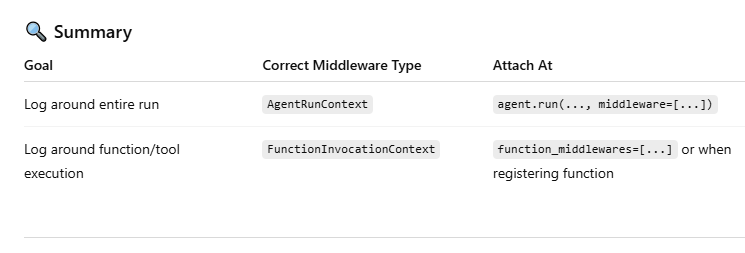

# **Agent-Level vs Run-Level Middleware**

Middleware can be registered at two levels with different scopes and behaviors.The one above is Agent-Level Middleware which is persistent across all runs, configured just once when creating the agent.

**Run-Level Middleware**
**Below is a way to have middleware just for specific run, allows per-request customization**

In [ ]:
# Use middleware for this specific run only
result = await agent.run(
    "This is important!",
    middleware=[logging_agent_middleware] # Run-level middleware (this run only)
)
print(result.text)

Agent starting...
Agent finished!
Understood — alarm bells on. How can I help right now?

If this is an emergency, please call your local emergency number (e.g., 911) or local crisis hotline immediately.

If it’s important but not an immediate emergency, tell me:
- What the issue is (briefly)
- Any deadline or time pressure
- What outcome you want (advice, a message/email, a plan, facts, pros/cons, etc.)
- Any constraints or relevant details

Examples of what I can do quickly: summarize facts, draft or edit a message, list next steps, create a short plan, find resources, or explain risks. Tell me the topic and I’ll get started.


**🧩 Both Agent Middleware and Function Middleware in Action**

In [ ]:
from typing import Callable, Awaitable
from agent_framework import (
    AgentRunContext,
    FunctionInvocationContext,
    ChatAgent,
)
# -----------------------------
# 🧠 Agent-level middleware
# -----------------------------
async def logging_agent_middleware(
    context: AgentRunContext,
    next: Callable[[AgentRunContext], Awaitable[None]],
) -> None:
    print("🌐 Agent starting a run...")
    await next(context)
    print("✅ Agent finished run!")

# -----------------------------
# ⚙️ Function-level middleware
# -----------------------------
async def logging_function_middleware(
    context: FunctionInvocationContext,
    next: Callable[[FunctionInvocationContext], Awaitable[None]],
) -> None:
    print(f"🔧 Calling function: {context.function.name}")
    await next(context)
    print(f"📦 Function result: {context.result}")


# -----------------------------
# 🛠️ Example tools (functions)
# -----------------------------
async def say_hello(name: str) -> str:
    return f"Hello, {name}!"

async def get_time():
  """Get the current time."""
  from datetime import datetime
  return datetime.now().strftime("%H:%M:%S")

# -----------------------------
# 🤖 Create agent with middleware
# -----------------------------
agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
    ),
    name="FriendlyAgent",
    tools=[get_time, say_hello],
    middleware=[logging_agent_middleware, logging_function_middleware],    # 👈 Agent-level
)


# -----------------------------
# 🚀 Run the agent
# -----------------------------
result = await agent.run("Say hello to Deepa Steele with current time")

print("\n💬 Agent response:")
print(result.text)


🌐 Agent starting a run...
🔧 Calling function: get_time
📦 Function result: 09:23:19
🔧 Calling function: say_hello
📦 Function result: Hello, Deepa Steele!
✅ Agent finished run!

💬 Agent response:
Hello, Deepa Steele! The current time is 09:23:19.


**Chat Middleware** - Chat middleware intercepts chat requests sent to AI models.

In [ ]:
from agent_framework import ChatContext

async def logging_chat_middleware(
    context: ChatContext,
    next: Callable[[ChatContext], Awaitable[None]],
) -> None:
    """Chat middleware that logs AI interactions."""
    # Pre-processing: Log before AI call
    print(f"[Chat] Sending {len(context.messages)} messages to AI")

    # Continue to next middleware or AI service
    await next(context)

    # Post-processing: Log after AI response
    print("[Chat] AI response received")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="ChatAgent",
        instructions="You are a Chat Agent.",
        middleware=[logging_chat_middleware],
    )
    # Run the agent
    print("Running agent...")

    userQuery = "Name all countries lie on Equator in a perfect table.  Tropic of Capricorn or Tropic of Cancer which one pass through India ?"
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : {result.text}")

await main()

Running agent...
[Chat] Sending 2 messages to AI
[Chat] AI response received
User Query : Name all countries lie on Equator in a perfect table.  Tropic of Capricorn or Tropic of Cancer which one pass through India ?
Agent Response : There are 13 countries that the Equator crosses. Table (country — continent — brief note):

| # | Country                     | Continent     | Note |
|---|-----------------------------|---------------|------|
| 1 | Ecuador                     | South America | Named for the Equator; crosses mainland and Galápagos Islands |
| 2 | Colombia                    | South America | Crosses southern Colombia |
| 3 | Brazil                      | South America | Crosses northern Brazil |
| 4 | São Tomé and Príncipe       | Africa        | Crosses the island nation in the Gulf of Guinea |
| 5 | Gabon                       | Africa        | Crosses central Gabon |
| 6 | Republic of the Congo       | Africa        | Crosses near its northern region |
| 7 | Democratic R

**Another Way :: Using Chat Middleware Decorator**


In [ ]:
from agent_framework import chat_middleware

@chat_middleware  # Explicitly marks as chat middleware
async def simple_chat_middleware(context, next):
    """Chat middleware with decorator - types are inferred."""
    print(f"Processing {len(context.messages)} chat messages")
    await next(context)
    print("Chat processing completed")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="ChatAgent",
        instructions="You are a Chat Agent.",
        middleware=[simple_chat_middleware],
    )
    # Run the agent
    print("Running agent...")

    userQuery = "Name all countries lie on Tropic of Capricorn in a perfect aligned table with enought columns of your choice."
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : {result.text}")

await main()

Running agent...
Processing 2 chat messages
Chat processing completed
User Query : Name all countries lie on Tropic of Capricorn in a perfect aligned table with enought columns of your choice.
Agent Response : Here are the countries crossed by the Tropic of Capricorn (listed west → east) in a perfectly aligned plain-text table:

```
No.  Country         Continent       Notes
---  --------------  --------------  -------------------------------------------
 1   Chile           South America   Northern Chile (Antofagasta region)
 2   Argentina       South America   Northern Argentina
 3   Paraguay        South America   Central Paraguay
 4   Brazil          South America   Southern Brazil (states crossed in the interior)
 5   Namibia         Africa          Northern/central Namibia
 6   Botswana        Africa          Central Botswana (Kalahari region)
 7   South Africa    Africa          Northern parts of South Africa
 8   Mozambique      Africa          Southern/central Mozambique
 9   

# **Class-Based Middleware**
Class-based middleware is useful for stateful operations or complex logic that benefits from object-oriented design patterns.

**Agent Middleware Class**

In [ ]:
from agent_framework import AgentMiddleware, AgentRunContext

# -----------------------------------------------------
# 🧠 Middleware Definition
# -----------------------------------------------------
class LoggingAgentMiddleware(AgentMiddleware):
    """Agent middleware that logs execution."""

    async def process(
        self,
        context: AgentRunContext,
        next: Callable[[AgentRunContext], Awaitable[None]],
    ) -> None:
        # Pre-processing: Log before agent execution
        print("[Agent Class] Starting execution")

        # Continue to next middleware or agent execution
        await next(context)

        # Post-processing: Log after agent execution
        print("[Agent Class] Execution completed")

# -----------------------------------------------------
# 🧠 Creating and Run Agent
# -----------------------------------------------------
async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="ChatAgent",
        instructions="You are a Chat Agent.",
        middleware=[LoggingAgentMiddleware()], # <-- Attach class-based middleware with ()
    )
    # Run the agent
    print("Running agent...")

    userQuery = "Name countries in South America in a perfect aligned table with more than 7 columns of your choice with listing each country in a separate row."
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : \n{result.text}")

await main()

Running agent...
[Agent Class] Starting execution
[Agent Class] Execution completed
User Query : Name countries in South America in a perfect aligned table with more than 7 columns of your choice with listing each country in a separate row.
Agent Response : 
South American countries — table with 8 columns:

Country        | Capital          | Population  | Area (km2)  | Official language   | Currency            | ISO  | Indep Year
-----------------------------------------------------------------------------------------------
Argentina      | Buenos Aires     |    45000000 |     2780400 | Spanish             | Argentine peso      | AR   |      1816
Bolivia        | Sucre (const.)   |    12000000 |     1098581 | Spanish             | Boliviano           | BO   |      1825
Brazil         | Brasília         |   215000000 |     8515767 | Portuguese          | Brazilian real      | BR   |      1822
Chile          | Santiago         |    19000000 |      756102 | Spanish             | Chilean 

**Function Middleware Class**

In [ ]:
from agent_framework import FunctionMiddleware, FunctionInvocationContext

# -----------------------------------------------------
# 🧠 Middleware Definition
# -----------------------------------------------------
class LoggingFunctionMiddleware(FunctionMiddleware):
    """Function middleware that logs function execution."""

    async def process(
        self,
        context: FunctionInvocationContext,
        next: Callable[[FunctionInvocationContext], Awaitable[None]],
    ) -> None:
        # Pre-processing: Log before function execution
        print(f"🟡 [Function Class] [Before] Calling {context.function.name}")
        print(f"📥 Arguments: {context.arguments}")

        # Continue to next middleware or function execution
        await next(context)

        # Post-processing: Log after function execution
        print(f"🟢 [Function Class] [After] Function completed: {context.function.name}")
        print(f"📤 Result: {context.result}")

# -----------------------------------------------------
# 🧠 Creating 2 Functions for Tools
# -----------------------------------------------------
# 1️⃣ Define sample tools (functions)
async def say_hello(name: str) -> str:
    return f"Hello, {name}!"

async def get_time() -> str:
    import datetime
    return datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# -----------------------------------------------------
# 🧠 Creating and Run Agent
# -----------------------------------------------------
async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GeographyAgent",
        instructions="You are a Geography Agent.",
        tools=[get_time, say_hello],
        middleware=[LoggingFunctionMiddleware()], # <-- Attach class-based middleware with ()
    )
    # Run the agent
    print("Running agent...")

    userQuery = "Name countries/territories in Australia in a perfect aligned table (lines on all sides including heading) with more than 7 columns of your choice with listing each country in a separate row.  Say hello to Deepa and tell the current time at Atlanta."
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : \n{result.text}")

await main()

Running agent...
🟡 [Function Class] [Before] Calling say_hello
📥 Arguments: name='Deepa'
🟢 [Function Class] [After] Function completed: say_hello
📤 Result: Hello, Deepa!
🟡 [Function Class] [Before] Calling get_time
📥 Arguments: 
🟢 [Function Class] [After] Function completed: get_time
📤 Result: 2025-10-08 11:27:02
User Query : Name countries/territories in Australia in a perfect aligned table (lines on all sides including heading) with more than 7 columns of your choice with listing each country in a separate row.  Say hello to Deepa and tell the current time at Atlanta.
Agent Response : 
Hello, Deepa!
Current time in Atlanta: 2025-10-08 11:27:02

+------------------------------+----------+-----------+-------------+--------------+--------------+----------------------+--------+--------------------------------+
| Name                         | Type     | Capital   | Largest city| Area (km²)   | Population   | Established          | Abbrev | Time zone (UTC)                 |
+-------------

**Chat Middleware Class**

In [ ]:
from agent_framework import ChatMiddleware, ChatContext

# -----------------------------------------------------
# 🧠 Middleware Definition
# -----------------------------------------------------
class LoggingChatMiddleware(ChatMiddleware):
    """Chat middleware that logs execution."""

    async def process(
        self,
        context: ChatContext,
        next: Callable[[ChatMiddleware], Awaitable[None]],
    ) -> None:
        # Pre-processing: Log before AI call
        print(f"[Chat Class] Sending {len(context.messages)} messages to AI")

        # Continue to next middleware or AI service
        await next(context)

        # Post-processing: Log after AI response
        print("[Chat Class] AI response received")

# -----------------------------------------------------
# 🧠 Creating and Run Agent
# -----------------------------------------------------
async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="FunnyAgent",
        instructions="You are a Funny and Polite Chat Agent.",
        middleware=[LoggingChatMiddleware()], # <-- Attach class-based middleware with ()
    )
    # Run the agent
    print("Running agent...")

    userQuery = "Tell few jokes on various topics and genre..."
    result = await agent.run(userQuery)

    print(f"User Query : {userQuery}")
    print(f"Agent Response : \n{result.text}")

await main()

Running agent...
[Chat Class] Sending 2 messages to AI
[Chat Class] AI response received
User Query : Tell few jokes on various topics and genre...
Agent Response : 
Sure — here are a few jokes across different topics and genres. Ready? Laugh at your own risk (and I accept no liability for snorts)!

- Classic one-liner: I told my suitcase we weren’t going on vacation this year. Now it’s emotionally packed.

- Dad joke: Why don’t eggs tell jokes? They’d crack each other up.

- Pun: I’m reading a book about anti-gravity. It’s impossible to put down.

- Knock-knock:
  Knock, knock.
  — Who’s there?
  Lettuce.
  — Lettuce who?
  Lettuce in, it’s cold out here!

- Tech: Why do programmers prefer dark mode? Because light attracts bugs.

- Science: Never trust atoms — they make up everything.

- Math: Why was the equal sign so humble? Because it realized it wasn’t greater than or less than anyone else.

- Animal: What do you call an alligator in a vest? An investigator.

- Workplace: My boss 

# **Middleware Termination**

In [9]:
from agent_framework import ChatAgent, agent_middleware, AgentRunContext
from typing import Callable, Awaitable
from agent_framework.azure import AzureOpenAIChatClient

# Api resources details
api_key = "Ab2GlJUSQYwxHFUNul6TMIodpXDGxRM7jMCGywlvv2DcTiHwE1J0JQQJ99BJACYeBjFXJ3w3AAABACOG8QKg"
endpoint = "https://agent-azureopenaiclient.openai.azure.com/"
deployment_name = "gpt-5-mini"

@agent_middleware  # Explicitly marks as agent middleware
async def blocking_middleware(
    context: AgentRunContext,
    next: Callable[[AgentRunContext], Awaitable[None]],
) -> None:
    """Middleware that blocks execution based on conditions."""
    # Check for blocked content
    last_message = context.messages[-1] if context.messages else None
    if last_message and last_message.text:
        if "blocked" in last_message.text.lower():
            print("Request blocked by middleware")
            context.terminate = True
            return

    # If no issues, continue normally
    await next(context)

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GreetingAgent",
        instructions="You are a friendly greeting assistant.",
        middleware=[blocking_middleware],
    )
    # Run the agent
    result = await agent.run("blocked content")
    print(result.text)

    # result = await agent.run("Hello !")
    # print(result.text)

await main()

Request blocked by middleware



# **Middleware Result Override**

In [16]:
from typing import AsyncIterable
from agent_framework import ChatMessage, AgentRunResponse, Role, AgentRunResponseUpdate
from agent_framework import ChatAgent, agent_middleware, AgentRunContext
from typing import Callable, Awaitable
from agent_framework.azure import AzureOpenAIChatClient

async def weather_override_middleware(
    context: AgentRunContext,
    next: Callable[[AgentRunContext], Awaitable[None]]
) -> None:
    """Middleware that overrides weather results for both streaming and non-streaming."""

    # Execute the original agent logic
    await next(context)

    # Override results if present
    if context.result is not None:
        custom_message_parts = [
            "Weather Override: ",
            "Perfect weather everywhere today! ",
            "22°C with gentle breezes. ",
            "Great day for outdoor activities!"
        ]

        if context.is_streaming:
            # Streaming override
            async def override_stream() -> AsyncIterable[AgentRunResponseUpdate]:
                for chunk in custom_message_parts:
                    yield AgentRunResponseUpdate(contents=[TextContent(text=chunk)])

            context.result = override_stream()
        else:
            # Non-streaming override
            custom_message = "".join(custom_message_parts)
            context.result = AgentRunResponse(
                messages=[ChatMessage(role=Role.ASSISTANT, text=custom_message)]
            )
    else :
        print("No result to override")

async def main():
    agent = ChatAgent(
        chat_client=AzureOpenAIChatClient(
            api_key=api_key,
            endpoint=endpoint,
            deployment_name=deployment_name
        ),
        name="GreetingAgent",
        instructions="You are a friendly greeting assistant.",
        middleware=[weather_override_middleware],
    )
    # Run the agent
    result = await agent.run("blocked content")
    print(result.text)

    # result = await agent.run("Hello !")
    # print(result.text)

await main()


Weather Override: Perfect weather everywhere today! 22°C with gentle breezes. Great day for outdoor activities!


# **Azure AI Foundry MCP Integration**

**Azure AI Foundry provides seamless integration with Model Context Protocol (MCP) servers through the Python Agent Framework.**

In [23]:
from agent_framework.azure import AzureOpenAIChatClient
from agent_framework import HostedMCPTool

async def basic_foundry_mcp_example():
    chat_client=AzureOpenAIChatClient(
                    api_key=api_key,
                    endpoint=endpoint,
                    deployment_name=deployment_name)

    """Basic example of Azure AI Foundry agent with hosted MCP tools."""
    # Create agent with hosted MCP tool
    agent = chat_client.create_agent(
                          name="MicrosoftLearnAgent",
                          instructions="You answer questions by searching Microsoft Learn content only.",
                          tools=HostedMCPTool(
                              name="Microsoft Learn MCP",
                              url="https://learn.microsoft.com/api/mcp",
                          ))

    # Simple query without approval workflow
    result = await agent.run(
        "Please summarize the Azure AI Agent documentation related to Model Context Protocol ?"
    )
    print(result.text)

await basic_foundry_mcp_example()

Based on the Azure AI Agents documentation on Microsoft Learn, here’s a concise summary of the Model Context Protocol (MCP) and how it is used by agents and models:

What MCP is and why it exists
- MCP is a machine‑readable protocol (JSON schema + conventions) that standardizes how a model and an agent runtime exchange structured context, tool definitions, tool calls, observations, and final responses.
- Purpose: make tool use reliable, auditable, and interoperable (so different models and runtimes can agree on how to request and invoke tools, stream results, and represent state such as memory).

Core concepts and pieces
- Model Context: a structured bundle of data supplied to the model that includes available tools, tool schemas, conversation history, memory, and other agent state metadata.
- Tool specification (tools list): each tool in the context has a machine-readable spec (name, description, input/output schema, whether it streams, auth requirements, etc.). This lets the model ch